## P11.1 Implement simulation of SIS model on ER graph. Compare results with our analytical findings. [2P]

Lambda (λ): 0.3
Critical Lambda (λ_c): 0.10010010010010009
The epidemic is expected to persist (λ > λ_c).


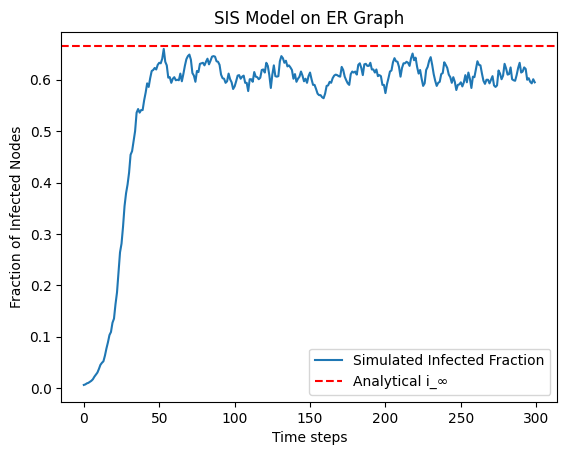

Analytical steady-state infection fraction: 0.666332999666333


In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def simulate_sis_er(N, p, beta, gamma, timesteps=100, initial_infected=5):

    G = nx.erdos_renyi_graph(N, p)

    state = np.zeros(N)
    infected_nodes = np.random.choice(N, initial_infected, replace=False)
    state[infected_nodes] = 1

    infected_fraction = []

    for t in range(timesteps):

        infected = np.where(state == 1)[0]

        for node in infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state[neighbor] == 0:
                    if np.random.rand() < beta:
                        state[neighbor] = 1

        for node in infected:
            if np.random.rand() < gamma:
                state[node] = 0

        infected_fraction.append(np.sum(state == 1) / N)

    return infected_fraction


N = 1000
p = 0.01
beta = 0.03        # Infection rate
#beta = 0.01    # epidemic die
gamma = 0.1      # Recovery rate
timesteps = 300

infected_fraction = simulate_sis_er(N, p, beta, gamma, timesteps)

avg_degree = p * (N - 1)
I_analytic = max(0, 1 - gamma / (beta * avg_degree))

lambda_c = 1 / avg_degree
lambda_param = beta / gamma

print(f"Lambda (λ): {lambda_param}")
print(f"Critical Lambda (λ_c): {lambda_c}")
if lambda_param > lambda_c:
    print("The epidemic is expected to persist (λ > λ_c).")
else:
    print("The epidemic is expected to die out (λ ≤ λ_c).")


plt.plot(infected_fraction, label="Simulated Infected Fraction")
plt.axhline(I_analytic, color="red", linestyle="--", label="Analytical i_∞")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Infected Nodes")
plt.title("SIS Model on ER Graph")
plt.legend()
plt.show()

print(f"Analytical steady-state infection fraction: {I_analytic}")
#compare the result with differents values and give the epidemic thresould

## P11.2 Implement simulation of SIS model on BA networks. Compare results with our analytical findings. [2P]

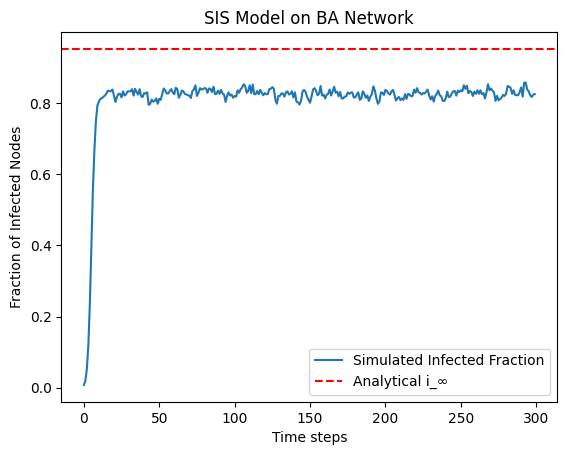

Average degree ⟨k⟩: 9.95
Average squared degree ⟨k^2⟩: 197.292
Critical Lambda (λ_c): 0.05043286093708817
Lambda (λ = β/γ): 1.0
Analytical steady-state infection fraction: 0.9521531100478469
The epidemic is expected to persist (λ > λ_c).


In [30]:
def simulate_sis_ba(N, m, beta, gamma, timesteps=100, initial_infected=5):

    G = nx.barabasi_albert_graph(N, m)

    state = np.zeros(N)
    infected_nodes = np.random.choice(N, initial_infected, replace=False)
    state[infected_nodes] = 1

    infected_fraction = []

    for t in range(timesteps):

        infected = np.where(state == 1)[0]

        for node in infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state[neighbor] == 0:
                    if np.random.rand() < beta:
                        state[neighbor] = 1

        for node in infected:
            if np.random.rand() < gamma:
                state[node] = 0

        infected_fraction.append(np.sum(state == 1) / N)

    return infected_fraction, G


N = 1000
m = 5
beta = 0.1
gamma = 0.1
timesteps = 300
Q=2

infected_fraction, G = simulate_sis_ba(N, m, beta, gamma, timesteps)

degrees = np.array([d for n, d in G.degree()])
avg_degree = np.mean(degrees)
avg_degree_squared = np.mean(degrees ** 2)
lambda_c = avg_degree / avg_degree_squared
lambda_param = beta / gamma
I_analytic =  lambda_param * Q * avg_degree / (1 + lambda_param * Q * avg_degree)
#I_analytic = max(0, 1 - gamma / (beta * avg_degree))

plt.plot(infected_fraction, label="Simulated Infected Fraction")
plt.axhline(I_analytic, color="red", linestyle="--", label="Analytical i_∞")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Infected Nodes")
plt.title("SIS Model on BA Network")
plt.legend()
plt.show()


print(f"Average degree ⟨k⟩: {avg_degree}")
print(f"Average squared degree ⟨k^2⟩: {avg_degree_squared}")
print(f"Critical Lambda (λ_c): {lambda_c}")
print(f"Lambda (λ = β/γ): {lambda_param}")
print(f"Analytical steady-state infection fraction: {I_analytic}")

if lambda_param > lambda_c:
    print("The epidemic is expected to persist (λ > λ_c).")
else:
    print("The epidemic is expected to die out (λ ≤ λ_c).")


## P11.3 Implement simulation of different than SIS agent-based model. Discuss obtained results. [2P]

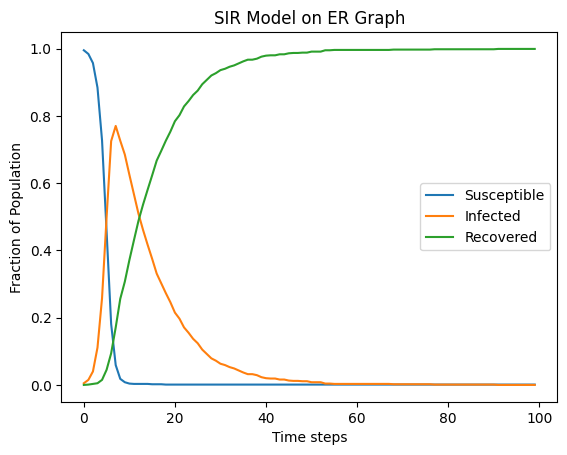

In [17]:
def simulate_sir_er(N, p, beta, gamma, timesteps=100, initial_infected=5):

    G = nx.erdos_renyi_graph(N, p)

    # 0 = Susceptible, 1 = Infectious, 2 = Recovered
    state = np.zeros(N)
    infected_nodes = np.random.choice(N, initial_infected, replace=False)
    state[infected_nodes] = 1

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for t in range(timesteps):

        susceptible_fraction.append(np.sum(state == 0) / N)
        infected_fraction.append(np.sum(state == 1) / N)
        recovered_fraction.append(np.sum(state == 2) / N)

        new_state = state.copy()
        infected = np.where(state == 1)[0]

        for node in infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state[neighbor] == 0:
                    if np.random.rand() < beta:
                        new_state[neighbor] = 1

            if np.random.rand() < gamma:
                new_state[node] = 2

        state = new_state

    return susceptible_fraction, infected_fraction, recovered_fraction


N = 1000
p = 0.01
beta = 0.2
gamma = 0.1
timesteps = 100

susceptible_fraction, infected_fraction, recovered_fraction = simulate_sir_er(N, p, beta, gamma, timesteps)


plt.plot(susceptible_fraction, label="Susceptible")
plt.plot(infected_fraction, label="Infected")
plt.plot(recovered_fraction, label="Recovered")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Population")
plt.title("SIR Model on ER Graph")
plt.legend()
plt.show()


 ## P11.4 Modify classical voter model that it takes into account additional effects (e.g. propaganda, agent ideology, etc.). [2P]

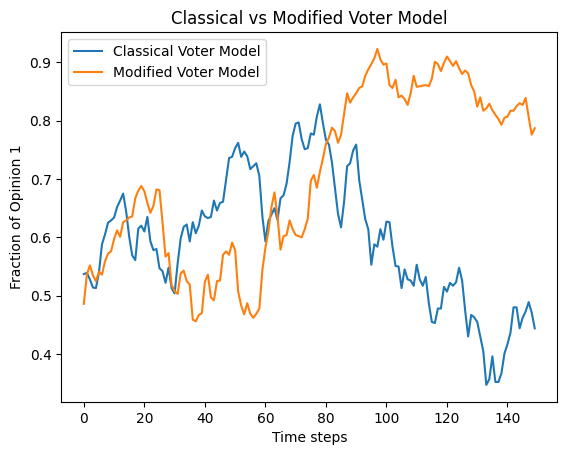

In [28]:
def classical_voter_model(N, p, timesteps):
    """
    Simulates the classical voter model.
    Returns:
        opinions_over_time: list - Fraction of agents with opinion 1 at each timestep.
    """

    G = nx.erdos_renyi_graph(N, p)

    opinions = np.random.choice([0, 1], size=N)

    opinions_over_time = []

    for t in range(timesteps):
        opinions_over_time.append(np.mean(opinions))

        for node in range(N):
            neighbor = np.random.choice(list(G.neighbors(node)))
            opinions[node] = opinions[neighbor]

    return opinions_over_time

def modified_voter_model(N, p, timesteps, propaganda_bias=0.1, ideology_resistance=0.2):
    """
    Simulates the modified voter model with propaganda and ideology effects.

        propaganda_bias: float - Probability of switching to a specific opinion due to propaganda.
        ideology_resistance: float - Probability an agent resists opinion change.
    Returns:
        opinions_over_time: list - Fraction of agents with opinion 1 at each timestep.
    """

    G = nx.erdos_renyi_graph(N, p)

    opinions = np.random.choice([0, 1], size=N)

    opinions_over_time = []

    for t in range(timesteps):
        opinions_over_time.append(np.mean(opinions))

        for node in range(N):
            if np.random.rand() < propaganda_bias:
                opinions[node] = 1
            else:
                neighbor = np.random.choice(list(G.neighbors(node)))
                if np.random.rand() > ideology_resistance:
                    opinions[node] = opinions[neighbor]

    return opinions_over_time

N = 1000
p = 0.1
timesteps = 150
propaganda_bias = 0.01
ideology_resistance = 0.3


classical_results = classical_voter_model(N, p, timesteps)
modified_results = modified_voter_model(N, p, timesteps, propaganda_bias, ideology_resistance)

plt.plot(classical_results, label="Classical Voter Model")
plt.plot(modified_results, label="Modified Voter Model")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Opinion 1")
plt.title("Classical vs Modified Voter Model")
plt.legend()
plt.show()
#average it